---
### 자연어처리
##### [1] with open('file' , 'r', encoding='utf-8' ) as f:
##### [2] Okt를 활용한 띄어쓰기 함수
##### [3] 불용어 불러오기
##### [4] 맞춤법 검사
---

In [40]:
#모듈 로딩
from konlpy.tag import Okt

#### [1]파일불러오기

In [50]:
with open('ratings_train.txt', 'r', encoding='utf-8') as f:
    text = f.readlines()
all_list = []
ids = []
labels = []
for i in text:
    x = i.split()
    ids.append(x[0])
    labels.append(x[-1])
    all_list.append(' '.join(x[1:-1]))
labels = labels[1:]
ids = ids[1:]
all_list = all_list[1:]

#### [2]띄어쓰기 함수

In [181]:
def spacing_okt(wrongSentence):
    okt = Okt()
    if wrongSentence == '':
        return ''
    else:
        tagged = okt.pos(wrongSentence)
        corrected = ""
        for i in tagged:
            if i[1] in ('Josa', 'PreEomi', 'Eomi', 'Suffix', 'Punctuation'):
                corrected += i[0]
            else:
                corrected += " "+i[0]
        if corrected[0] == " ":
            corrected = corrected[1:]
        return corrected

print(spacing_okt('안녕하세요'))

안녕하세요


#### [3]불용어 리스트 생성

In [52]:
with open('stopwords_kor.txt',mode= 'r',encoding= 'UTF-8') as f:
    stop_kor = f.readlines()
stop_words_kor = []
for i in stop_kor:
    x = i.replace('\n', '')
    stop_words_kor.append(x)
addtional_stop_words_kor = []#추가 불용어
stop_words_kor = stop_words_kor+addtional_stop_words_kor
len(stop_words_kor)


684

In [55]:
all_list

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

#### [4]구두점 및 특수 문자 영어 제거

In [103]:
import re

remove_sentences = []
regPun = r'[!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n]'
regKor = r'[^\uAC00-\uD7A3]'
for i in all_list:
    if len(i) > 0:
        remove_str= spacing_okt(i)
    remove_str = re.sub(regPun, ' ', remove_str)
    remove_str = re.sub(regKor, ' ', remove_str)
    sentence = remove_str.replace(',', '')
    sentence = sentence.replace('.', '')
    sentence = sentence.replace('-', '') 
    sentence = sentence.replace('/', '')
    remove_sentences.append(sentence)

#### [5]불용어 처리

In [ ]:
sentences = []
for i in remove_sentences:
    words = i.split()
    filter_words =''
    for word in words:
        if word not in stop_words_kor:
            filter_words += word + ' '
    sentences.append(filter_words)

#### [6]Train Test Data split

In [63]:
import numpy as np
train_sentences = np.array(sentences[0:140000])
test_sentences = np.array(sentences[140000:])
train_labels = np.array(labels[0:140000],dtype=int)
test_labels = np.array(labels[140000:],dtype=int)

In [82]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 20000, oov_token="<OOV>")

In [83]:
tokenizer.fit_on_texts(train_sentences)


In [84]:
word_index = tokenizer.word_index
len(word_index)

165904

In [102]:
word_count = tokenizer.word_counts
word_count  
sorted(word_count.items(), key=lambda x: x[1],reverse=True)

[('영화', 27989),
 ('이', 13474),
 ('너무', 10389),
 ('정말', 9034),
 ('진짜', 7649),
 ('잘', 5241),
 ('이런', 5052),
 ('다', 4854),
 ('한', 4773),
 ('점', 4766),
 ('안', 4640),
 ('왜', 4606),
 ('하는', 4430),
 ('보고', 4266),
 ('그', 4259),
 ('못', 4217),
 ('더', 3903),
 ('그냥', 3827),
 ('본', 3715),
 ('내', 3409),
 ('좀', 3351),
 ('없는', 3247),
 ('거', 3137),
 ('영화를', 3128),
 ('년', 3050),
 ('평점', 3047),
 ('수', 2993),
 ('드라마', 2927),
 ('생각', 2899),
 ('봤는데', 2864),
 ('영화가', 2855),
 ('영화는', 2826),
 ('아', 2804),
 ('때', 2777),
 ('할', 2718),
 ('없다', 2690),
 ('다시', 2658),
 ('연기', 2563),
 ('최고', 2558),
 ('쓰레기', 2549),
 ('이건', 2510),
 ('좋은', 2498),
 ('최고의', 2414),
 ('입니다', 2400),
 ('같은', 2392),
 ('있는', 2376),
 ('완전', 2336),
 ('시간', 2237),
 ('내가', 2140),
 ('보는', 2133),
 ('이렇게', 2096),
 ('스토리', 2055),
 ('것', 2015),
 ('참', 1987),
 ('봐도', 1980),
 ('걸', 1954),
 ('없고', 1915),
 ('그리고', 1857),
 ('뭐', 1845),
 ('임', 1807),
 ('재밌게', 1802),
 ('많이', 1801),
 ('별', 1799),
 ('이게', 1743),
 ('평점이', 1724),
 ('보면', 1671),
 ('역시', 1664),
 ('또

In [80]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

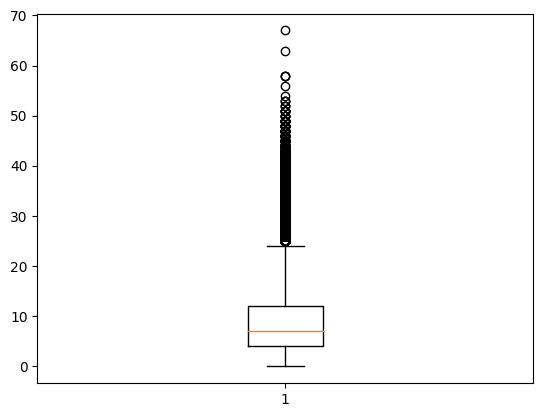

In [110]:
import matplotlib.pyplot as plt
train_sequences = tokenizer.texts_to_sequences(train_sentences)
lengths = [len(x) for x in train_sequences]
# plt.hist(lengths)
plt.boxplot(lengths)
#maxlength 50으로
train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen = 50,padding='post',truncating='pre')
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen = 50,padding='post',truncating='pre')

In [121]:
train_padded.shape

(140000, 50)

In [ ]:
#input_shape = 토큰수 X  text길이(50) *wordNum()
#1801w 1b  *8

In [150]:
class lstm_model(tf.keras.Model):
    def __init__(self):
        super(lstm_model,self).__init__()
        self.embedding_layer = tf.keras.Sequential([
            tf.keras.layers.Embedding(20000,32,input_length = 50) #voca , dim, maxlen                    
        ])
        self.lstm_layer = tf.keras.Sequential([
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True))
        ])
        self.out_layer = tf.keras.Sequential([
            tf.keras.layers.Dense(32),
            tf.keras.layers.ReLU(),
            tf.keras.layers.Dense(1,activation = 'sigmoid')
        ])
    def call(self, x):
        x = self.embedding_layer(x)
        x = self.lstm_layer(x)
        x = self.out_layer(x)
        return x


In [162]:
class lstm_model(tf.keras.Model):
    def __init__(self):
        super(lstm_model,self).__init__()
        self.embedding_layer = tf.keras.Sequential([
            tf.keras.layers.Embedding(20000,32,input_length=50)                    
        ])
        self.lstm_layer = tf.keras.Sequential([
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True, dropout=0.2)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,dropout=0.2))
        ])
        
        self.out_layer = tf.keras.Sequential([
            tf.keras.layers.Dense(32),
            tf.keras.layers.ReLU(),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        
    def call(self, x):
        x = self.embedding_layer(x)
        x = self.lstm_layer(x)
        x = self.out_layer(x)
        return x

model = lstm_model()
model.build(input_shape=(128, 50))


In [161]:
model.summary()

Model: "lstm_model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_96 (Sequential)  (None, 50, 32)            640000    
                                                                 
 sequential_97 (Sequential)  (128, 64)                 41472     
                                                                 
 sequential_98 (Sequential)  (128, 1)                  2113      
                                                                 
Total params: 683,585
Trainable params: 683,585
Non-trainable params: 0
_________________________________________________________________


In [166]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [167]:
check_point = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', 
                                                 filepath='checkcheck.ckpt', 
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose = 1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [170]:
history = model.fit(train_padded, train_labels,callbacks=[check_point, early_stop], validation_data=(test_padded,test_labels),epochs = 50,batch_size=128)

Epoch 1/50
1094/1094 [==============================] - ETA: 0s - loss: 0.5188 - accuracy: 0.7461
Epoch 1: val_loss improved from 0.67630 to 0.46913, saving model to checkcheck.ckpt
1094/1094 [==============================] - 88s 81ms/step - loss: 0.5188 - accuracy: 0.7461 - val_loss: 0.4691 - val_accuracy: 0.7835
Epoch 2/50
1094/1094 [==============================] - ETA: 0s - loss: 0.4756 - accuracy: 0.7735
Epoch 2: val_loss improved from 0.46913 to 0.44467, saving model to checkcheck.ckpt
1094/1094 [==============================] - 76s 70ms/step - loss: 0.4756 - accuracy: 0.7735 - val_loss: 0.4447 - val_accuracy: 0.7961
Epoch 3/50
1093/1094 [============================>.] - ETA: 0s - loss: 0.4485 - accuracy: 0.7888
Epoch 3: val_loss improved from 0.44467 to 0.42722, saving model to checkcheck.ckpt
1094/1094 [==============================] - 98s 89ms/step - loss: 0.4485 - accuracy: 0.7888 - val_loss: 0.4272 - val_accuracy: 0.8052
Epoch 4/50
1094/1094 [===========================

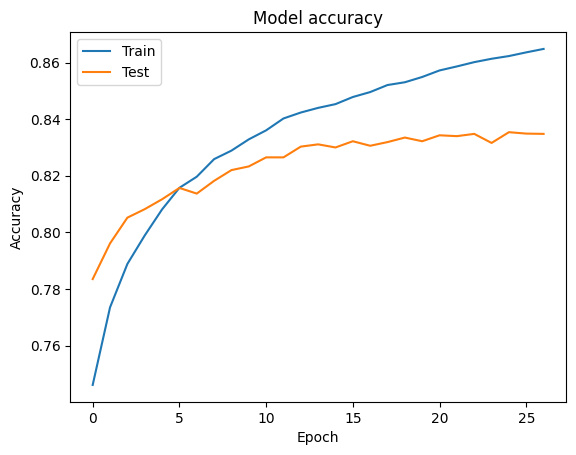

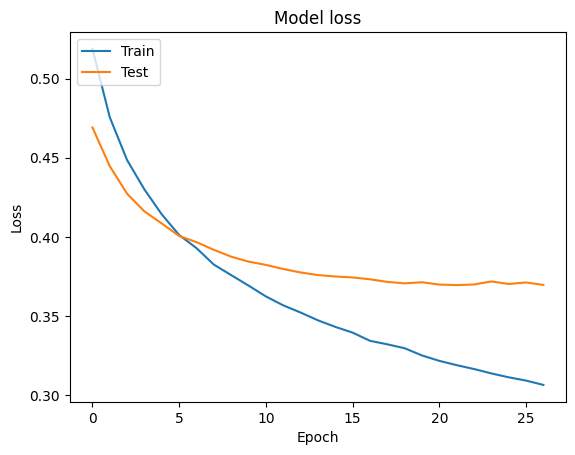

In [171]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [174]:
model.evaluate(test_padded, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3696 - accuracy: 0.8348


[0.3695966303348541, 0.8348000049591064]